In [9]:
# Import Libraries
import os
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Clenup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
df = df[df['job_title_short'] == 'Data Analyst']

In [29]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
  skill_count=('job_skills', 'count'),
  median_salary=('salary_year_avg', 'median'),
)
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)


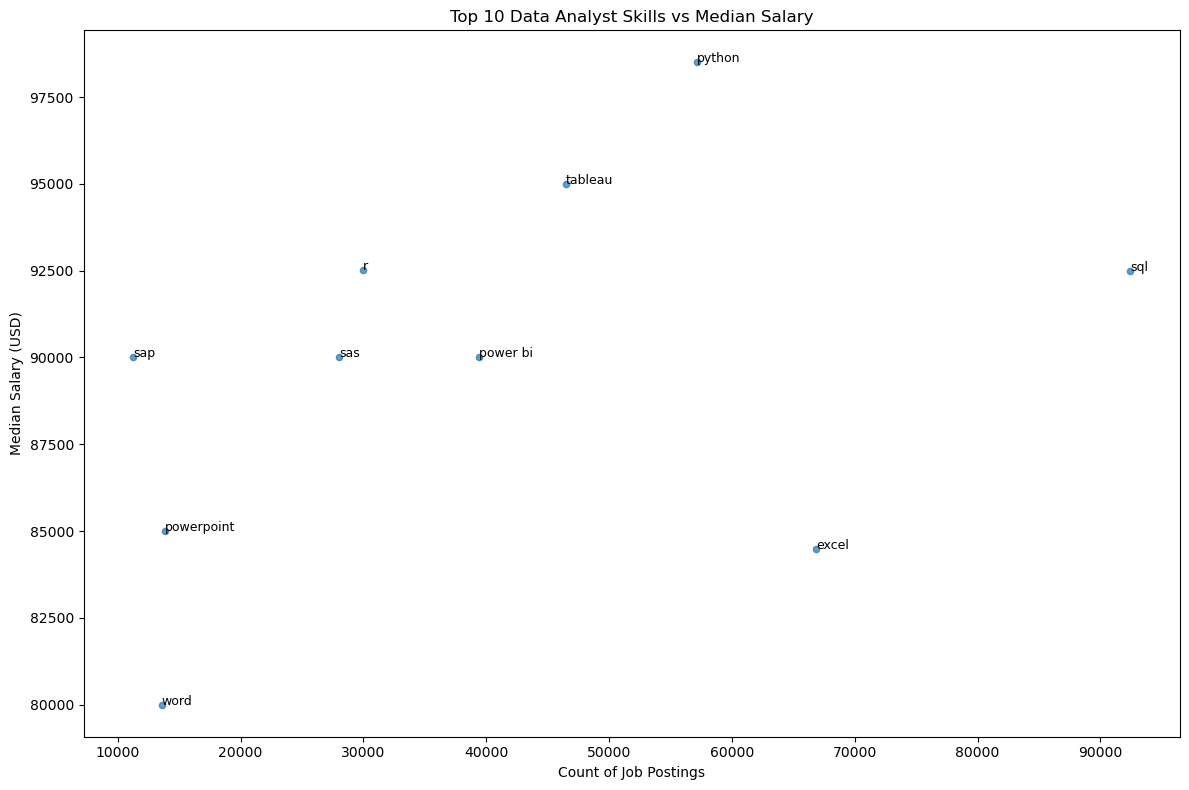

In [34]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary', figsize=(12, 8), alpha=0.7)
plt.title('Top 10 Data Analyst Skills vs Median Salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
  plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt, fontsize=9)

plt.show()